![imagen](./img/steps_EDA.png)

## <span style="color:Grey">INFORMACIÓN DEL PROYECTO</span>

### <span style="color:Lightsalmon">TÍTULO</span>

#### **<span style="color:F5F5F5"> Siniestralidad y seguridad vial en vias urbanas a nivel municipal**</span>

### <span style="color:Lightsalmon">TEMA</span>

* La comisión europea anunció en Abril de 2021 los datos de seguridad vial en la Unión Europea, siendo España uno de los países más seguros para viajar por carretera, con 29 fallecidos por millón de habitantes.
Es el cuarto país de la Unión Europea con menor tasa de mortalidad, por detrás de Suecia (18), Malta (21) y Dinamarca (27) y por delante, de países de referencia en seguridad vial como Holanda (31), Alemania (33) y Francia (39).  
Estás variaciones, en parte son consecuencia del COVID-19, que apartó, a muchas personas de la carretera durante una temporada y que más tarde experimentó un aumento significativo en usuarios de bicicleta.

* Este análisis se centra en medir, mediante el cruce de datos del INE y la DGT, el impacto que tuvo la pandemia, cómo afectó el corportamiento del conductor después y si afectó al nº de accidentes en España en vías urbanas.

### <span style="color:Lightsalmon">HIPÓTESIS</span>

1. La hipótesis principal es cuantificar la mejora en la seguridad vial y como ha evolucionado desde 2020, un año atípico por la pandemia, y comprobar si en los últimos años se ha mantenido la tendencia o ha mejorado. 

2. Otras hipótesis son, en relación a los datos, ver dónde ocurren más accidentes, qué factores están involucrados y de qué tipo son...

3. Qué colectivo está más afectado...

4. Qué impacto tiene la edad de un vehículo y si existe una fuerte relación con los accidentes/mortalidad...

5. Otros datos que puedan ser de interés que aparecerán a lo largo del análisis.

## <span style="color:Grey">OBTENCIÓN DE LOS DATOS</span>

### <span style="color:Lightsalmon">PREPROCESADO</span>

* Los 3 documentos son parecidos, archivos de excel de 90+ columnas y 8100+ filas. Las primeras 90 son iguales, pero al final cada fichero termina de una manera distinta con columnas de más o de menos.
* "DatosMunicipales2020" tiene 97 columnas de A-CU.
* "DatosMunicipales2021" tiene 95 columnas de A-CQ
* "DatosMunicipales2022" tiene de 99 columnas A-CU

Un inciso antes del susto por tener tantas columnas, entre datos hay columnas vacias (6 en total) y la mayoria de datos son subcategorias, i.e.: 
- Bicicletas Fallecidos, Bicicletas Heridos Graves, Bicicletas Heridos Leves
- Ciclomotores Fallecidos, Ciclomotores Heridos Graves, Ciclomotores Heridos Leves
- Motocicletas...
- Turismos...
- Camiones...


Antes de subirlas en un dataframe trabajo con ellas para igualar el numero de columnas, en el propio excel. 

* Para 2020 añado 2 columnas CM (Casco, Cinturon, SRI 4 pts) y CO (Movil 6pts), para igualar a 2022.
* Y para el año 2021, añado en CU (Total Campañas) además de CM (Casco, Cinturon, SRI 4 pts) y en CO (Movil 6pts)

* Una vez que tengo mis 3 datasets de 99x8196 datos cada uno. Los importo.

* Todos los datos vienen de ``"https://www.dgt.es/menusecundario/dgt-en-cifras/dgt-en-cifras-resultados/?q=Datos%20Municipales&tema=informacion-municipal&pag=1&order=DESC"``

In [1]:
import pandas as pd

# Cargo los dataset desde la carpeta data
df22 = pd.read_excel("./data/DatosMunicipales2022.xlsx")
df21 = pd.read_excel("./data/DatosMunicipales2021.xlsx")
df20 = pd.read_excel("./data/DatosMunicipales2020.xlsx")

In [2]:
# Añado una columna con el año de los datos para cada dataframe
df22["Anho"]=2022
df21["Anho"]=2021
df20["Anho"]=2020

In [3]:
# Se une en un solo df llamado dgt
dgt=pd.concat([df22,df21,df20], axis=0, ignore_index=True)

In [4]:
# Añado una muestra
dgt.sample(50)

,Código INE,Municipio,Provincia,Comunidad Autónoma,Población Total,Población Hombres,Población Mujeres,Unnamed: 7,Conductores Hombres,Conductoras Mujeres,...,Móvil (3 puntos),Móvil (6 puntos),Semáforo (4 puntos),Otra (3 puntos),Otra (4 puntos),Otra (6 puntos),Unnamed: 97,Total Campañas,Anho,Campañas
13668,37088,Carrascal del Obispo,Salamanca,Castilla y León,194.0,106.0,88.0,NaN,69.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
20572,26138,Nalda,Rioja (La),Rioja (La),1057.0,582.0,475.0,NaN,395.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1.0
5743,37371,Villasrubias,Salamanca,Castilla y León,252.0,134.0,118.0,NaN,90.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
22986,44052,Vinebre,Tarragona,Cataluña,425.0,215.0,210.0,NaN,160.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
3009,19163,Luzón,Guadalajara,Castilla-La Mancha,65.0,32.0,33.0,NaN,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
20727,28046,Anchuelo,Madrid,Madrid (Comunidad de),1286.0,667.0,619.0,NaN,432.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1.0
18221,12018,Castellon/Castello ( municipio sin especificar),Castellón/Castelló,Comunitat Valenciana,NaN,NaN,NaN,NaN,80.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
13005,31156,Lizoáin-Arriasgoiti,Navarra,Navarra (Comunidad Foral de),314.0,184.0,130.0,NaN,118.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
5287,34902,Valle del Retortillo,Palencia,Castilla y León,178.0,95.0,83.0,NaN,79.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN
12718,29019,Arenas,Málaga,Andalucía,1181.0,615.0,566.0,NaN,412.0,233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [5]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Columns: 101 entries, Código INE to Campañas
dtypes: float64(96), int64(2), object(3)
memory usage: 18.9+ MB


In [6]:
dgt.columns

Index(['Código INE', 'Municipio', 'Provincia', 'Comunidad Autónoma',
       'Población Total', 'Población Hombres', 'Población Mujeres',
       'Unnamed: 7', 'Conductores Hombres', 'Conductoras Mujeres',
       ...
       'Móvil (3 puntos)', 'Móvil (6 puntos)', 'Semáforo (4 puntos)',
       'Otra (3 puntos)', 'Otra (4 puntos)', 'Otra (6 puntos)', 'Unnamed: 97',
       'Total Campañas', 'Anho', 'Campañas'],
      dtype='object', length=101)

In [7]:
# Eliminamos columnas vacias(Unnamed) y la que se llama Campañas,
# porque se creó a mayores por no tener el tirulo igual al resto
dgt.drop(columns=["Unnamed: 7","Unnamed: 11","Unnamed: 41","Unnamed: 48","Unnamed: 80","Unnamed: 97","Campañas"], axis=1, inplace=True)

In [8]:
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  int64  
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

In [9]:
# Se guarda en un archivo excel, solo la primera vez, para tenerlo como salvaguarda
#dgt.to_excel('./data/dgt_202122.xlsx', index=False)

### <span style="color:Lightsalmon">COLUMNAS</span>

Las columnas (94), una vez que eliminamos las columnas vacías del dataframe, son:

|nCol|Columna|Informacion|
|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|
|1|Municipio| Municipio|
|2|Provincia|Provincia|
|3|Comunidad Autonoma|COmnidad Autonoma|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|
|5|Poblacion Hombres|nº de Hombres en ese municipio|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|
|7|Conductores Hombres|nº de conductores hombres|
|8|Conductoras Mujeres|nº de conductoras mujeres|
|9|Censo Conductores|nº total de conductores|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|
|15|Parque Total|nº de vehiculos en resgistrados totales|
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|
|19-38|Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|
|76|Total Sanciones con Puntos|Número de sanciones con detracción de puntos|
|77|Total Puntos Detraidos|Nº de puntos retirados por las infracciones|
|78-91|Sanciones(Puntos)|nº de infracciones para cada sanción|
|92|Total campañas|Nº de Campañas de tráfico para controlar la seguridad vial|
|93|Anho|Año en el que se obtuvieron los datos|

#### CARDINALIDAD DE LAS VARIABLES

In [10]:
# El código INE es en realidad una variable categórica, ya que cada valor pertenece a un municipio, le cambiamos el tipo a objetc
dgt["Código INE"] = dgt["Código INE"].astype(object)
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  object 
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

In [11]:
# Calculo de cardinalidad
df_cardinalidad = pd.DataFrame([dgt.nunique(), dgt.nunique()/len(dgt) * 100, dgt.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_cardinalidad

,Card,%_Card,Tipo
Código INE,8196,33.333333,object
Municipio,8179,33.264194,object
Provincia,52,0.211485,object
Comunidad Autónoma,19,0.077273,object
Población Total,7251,29.489995,float64
...,...,...,...
Otra (3 puntos),202,0.821539,float64
Otra (4 puntos),155,0.630389,float64
Otra (6 puntos),139,0.565316,float64
Total Campañas,12,0.048804,float64


#### CLASIFICACION VARIABLES

In [12]:
# Clasificacion de variables
df_cardinalidad["Clasificada_como"] = "Numérica Discreta"
df_cardinalidad.loc[df_cardinalidad["Tipo"] == "object", "Clasificada_como"] = "Categórica"
df_cardinalidad.loc[(df_cardinalidad["Card"] < 5) & (df_cardinalidad["Tipo"] == "int64"), "Clasificada_como"] = "Categórica"
df_cardinalidad.loc[(df_cardinalidad["%_Card"] > 30) & (df_cardinalidad["Tipo"] == "float64"), "Clasificada_como"] = "Numérica Continua"
df_cardinalidad.Clasificada_como.value_counts()


Clasificada_como
Numérica Discreta    83
Numérica Continua     6
Categórica            5
Name: count, dtype: int64

In [13]:
df_cardinalidad

,Card,%_Card,Tipo,Clasificada_como
Código INE,8196,33.333333,object,Categórica
Municipio,8179,33.264194,object,Categórica
Provincia,52,0.211485,object,Categórica
Comunidad Autónoma,19,0.077273,object,Categórica
Población Total,7251,29.489995,float64,Numérica Discreta
...,...,...,...,...
Otra (3 puntos),202,0.821539,float64,Numérica Discreta
Otra (4 puntos),155,0.630389,float64,Numérica Discreta
Otra (6 puntos),139,0.565316,float64,Numérica Discreta
Total Campañas,12,0.048804,float64,Numérica Discreta


Termino de completar mi cuadro de variables

|nCol|Columna|Informacion|Tipo Variable| Importancia|Notas|
|-|-|-|-|-|-|
|0|Codigo INE|Correspondientes a cada municipio, se componen de cinco dígitos: los dos primeros corresponden al código de la provincia y los tres restantes al del municipio dentro de ésta|Categórica|1||
|1|Municipio| Municipio|Categorica|1|Mas relevante que provincia|
|2|Provincia|Provincia|Categorica|2|
|3|Comunidad Autonoma|Comunidad Autonoma|Numerica Discreta|2|Pruebas demograficas|
|4|Poblacion Total|Suma de la poblacion Hombres y Poblacion Mujeres|Numerica Discreta|2|Pruebas demograficas|
|5|Poblacion Hombres|nº de Hombres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|6|Poblacion Mujeres|nº de Mujeres en ese municipio|Numerica Discreta|2|Pruebas demograficas|
|7|Conductores Hombres|nº de conductores hombres|Numerica Discreta|2|Pruebas demograficas|
|8|Conductoras Mujeres|nº de conductoras mujeres|Numerica Discreta|2|Pruebas demograficas|
|9|Censo Conductores|nº total de conductores|Numerica Discreta|2|Pruebas demograficas|
|10-14|Parque Vehículos|nº de vehículos registrados(Se excluyen los que están en situación de baja)|Numerica Discreta|1|Nos puede servir para encontrar informacion util|
|15|Parque Total|nº de vehiculos en resgistrados totales|Numerica Discreta|1||
|16-18|Vehículos sin ITV(<25años)|Motocicletas,Turismos y Resto de vehiculos sin itv <25 años|Numerica Discreta|1||
|19-38|Parque de vehículos|Antigüedad del parque de vehiculos, en grupos de <25, <15, <8, <4|Numérica discreta|2|Variables de referencia para explicar los accidentes|
|39-44|Antiguëdad media|Promedio de la antigüedad del parque con < 25 años para cada clase de vehículos.|Numérica continua|2|Variables de referencia para explicar los accidentes|
|45-75|Siniestralidad vial en vías urbanas|Heridos Graves, Leves o Fallecidos en según que vehículo por accidente|Numérica discreta|0|mis variables mas importantes están aqui|
|76|Total Sanciones con Puntos|Número de sanciones con detracción de puntos|Numérica discreta|3|meramente informativa|
|77|Total Puntos Detraidos|Nº de puntos retirados por las infracciones|Numérica discreta|3|meramente informativa|
|78-91|Sanciones(Puntos)|nº de infracciones para cada sanción|Numérica discreta|3|meramente informativa|
|92|Total campañas|Nº de Campañas de tráfico para controlar la seguridad vial|Numérica discreta|2|Datos 
|93|Anho|Año en el que se obtuvieron los datos|Categórica|1|La vamos a utilizar para comparar por años|

### <span style="color:Lightsalmon">LIMPIEZA</span>

In [14]:
# Para limpiar mis datos voy a fijarme cuales son NaN y como los puedo rellenar
dgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24588 entries, 0 to 24587
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código INE                              24588 non-null  object 
 1   Municipio                               24588 non-null  object 
 2   Provincia                               24588 non-null  object 
 3   Comunidad Autónoma                      24588 non-null  object 
 4   Población Total                         24393 non-null  float64
 5   Población Hombres                       24393 non-null  float64
 6   Población Mujeres                       24393 non-null  float64
 7   Conductores Hombres                     24496 non-null  float64
 8   Conductoras Mujeres                     24496 non-null  float64
 9   Censo Conductores                       24496 non-null  float64
 10  Parque Ciclomotores                     24516 non-null  fl

* (A) Lo primero que veo es que hay municipios sin especificar, que no contienen datos de poblacion, pero si pueden contener valores en el resto.
* (B) Hay algunos municipios que no incluyen datos de antiguedad de algún transporte, porque coincide que tienen 0 vehículos.
* (C) Existen municipios donde no hay recogidos valores para los heridos leves, graves o fallecidos de ningun tipo.
* (D) La mayoría de los municipios no tienen datos en las columnas de sanciones por tipo.


* Para los casos A, B y C voy a rellenar esos valores con 0, ya que suponemos que la falta de valores coincide con que hay 0 casos.
* En el caso (D), estas columnas tienen muy pocos valores, me dan poca informacion. Me las voy a guardar en otro dataframe con el codigo ine y el año, para no trabajar con ellos directamente, pero los quiero dejar apartados por si luego me interesan, pero de primeras las elimino.

In [15]:
# Hago una copia del dataframe para las columnas desde la 76 a la 92
columnas_puntos=[dgt.columns[0]]+list(dgt.columns[76:93])+[dgt.columns[-1]]
dgt_puntos=dgt[columnas_puntos].copy()

In [16]:
# Elimino las filas del dataframe principal: dgt
dgt.drop(dgt.columns[76:93], axis=1, inplace=True)

In [17]:
# Ahora relleno los valores NaN con 0
dgt.fillna(0, inplace=True)

## <span style="color:Grey">ANÁLISIS EXPLORATORIO DE DATOS (EDA)</span>

### <span style="color:Lightsalmon">ANALISIS UNIVARIANTE</span>

In [18]:
# Utilizo el fichero donde tengo las funciones de las gráficas
from utils.Graficos import barras_frecuencias

* Empiezo por el análisis de las variables categóricas (Anho, Municipio, Provincia, Comunidad Autónoma)

In [38]:
dgt.Anho.value_counts()

Anho
2022    8196
2021    8196
2020    8196
Name: count, dtype: int64

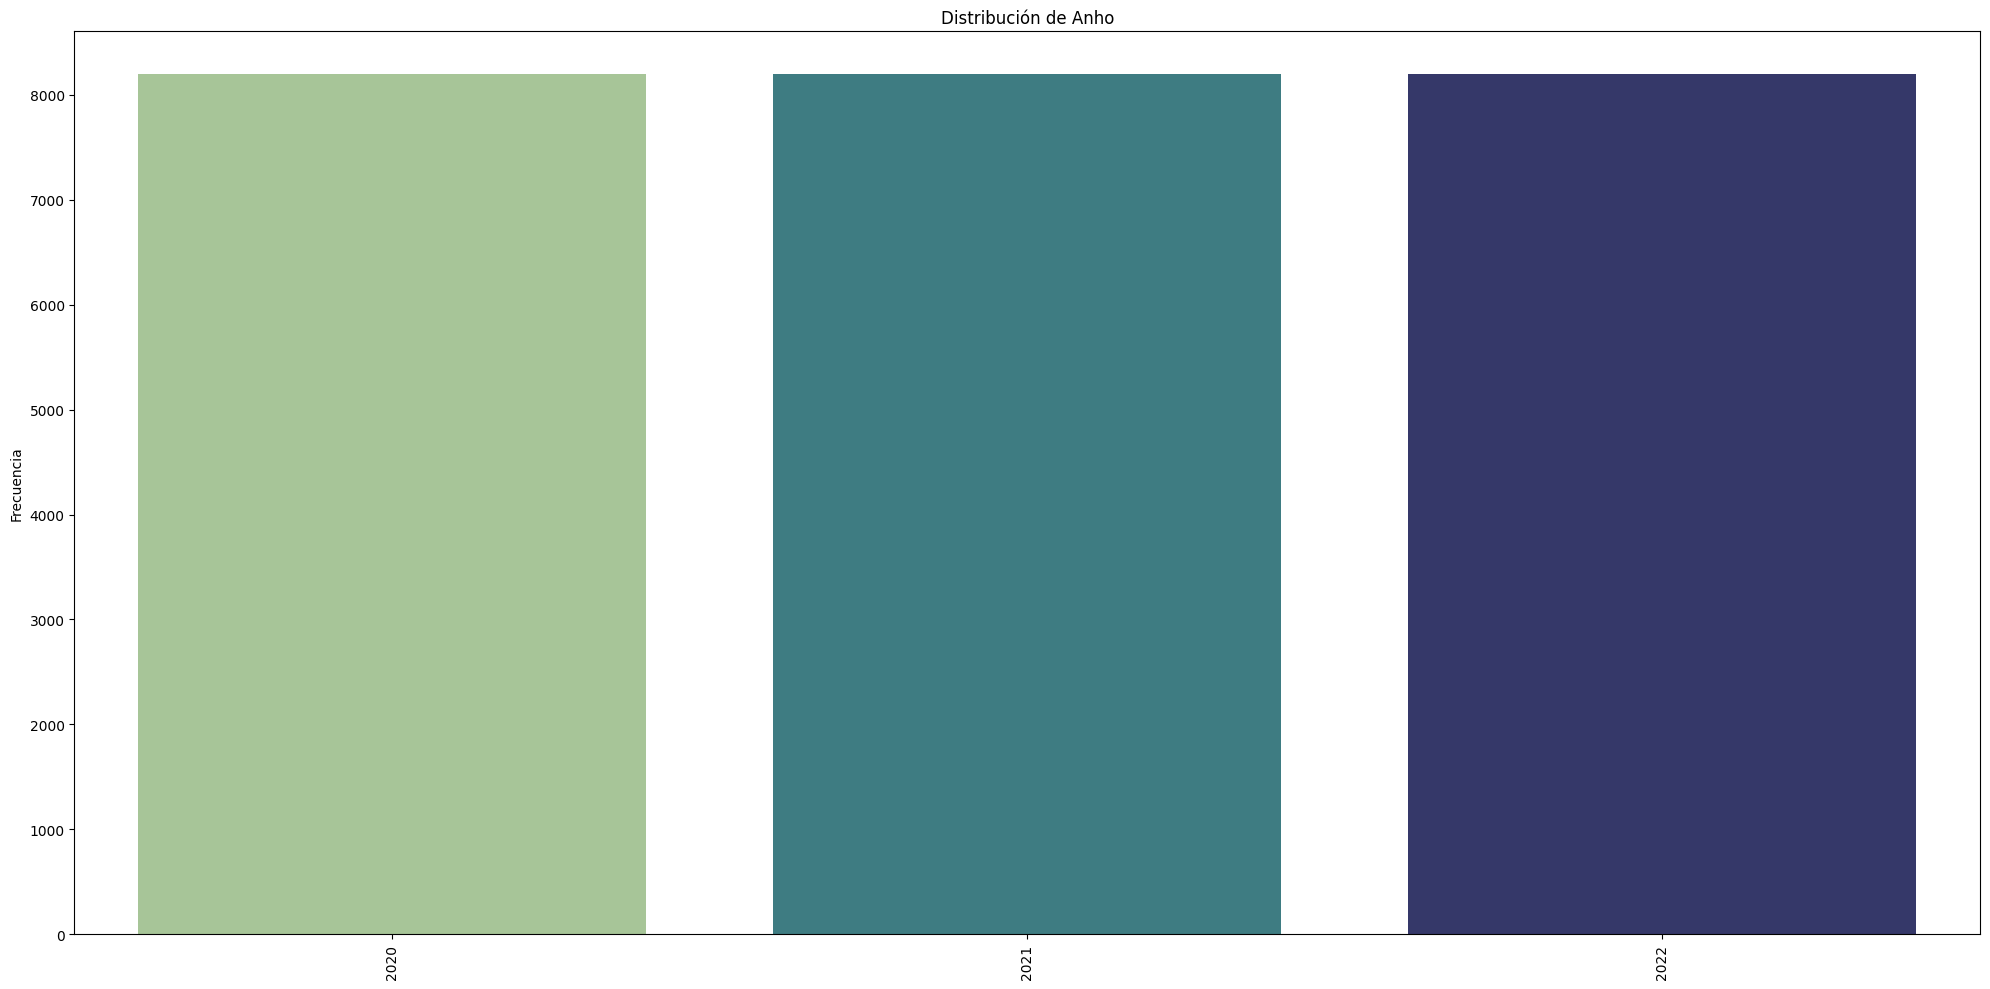

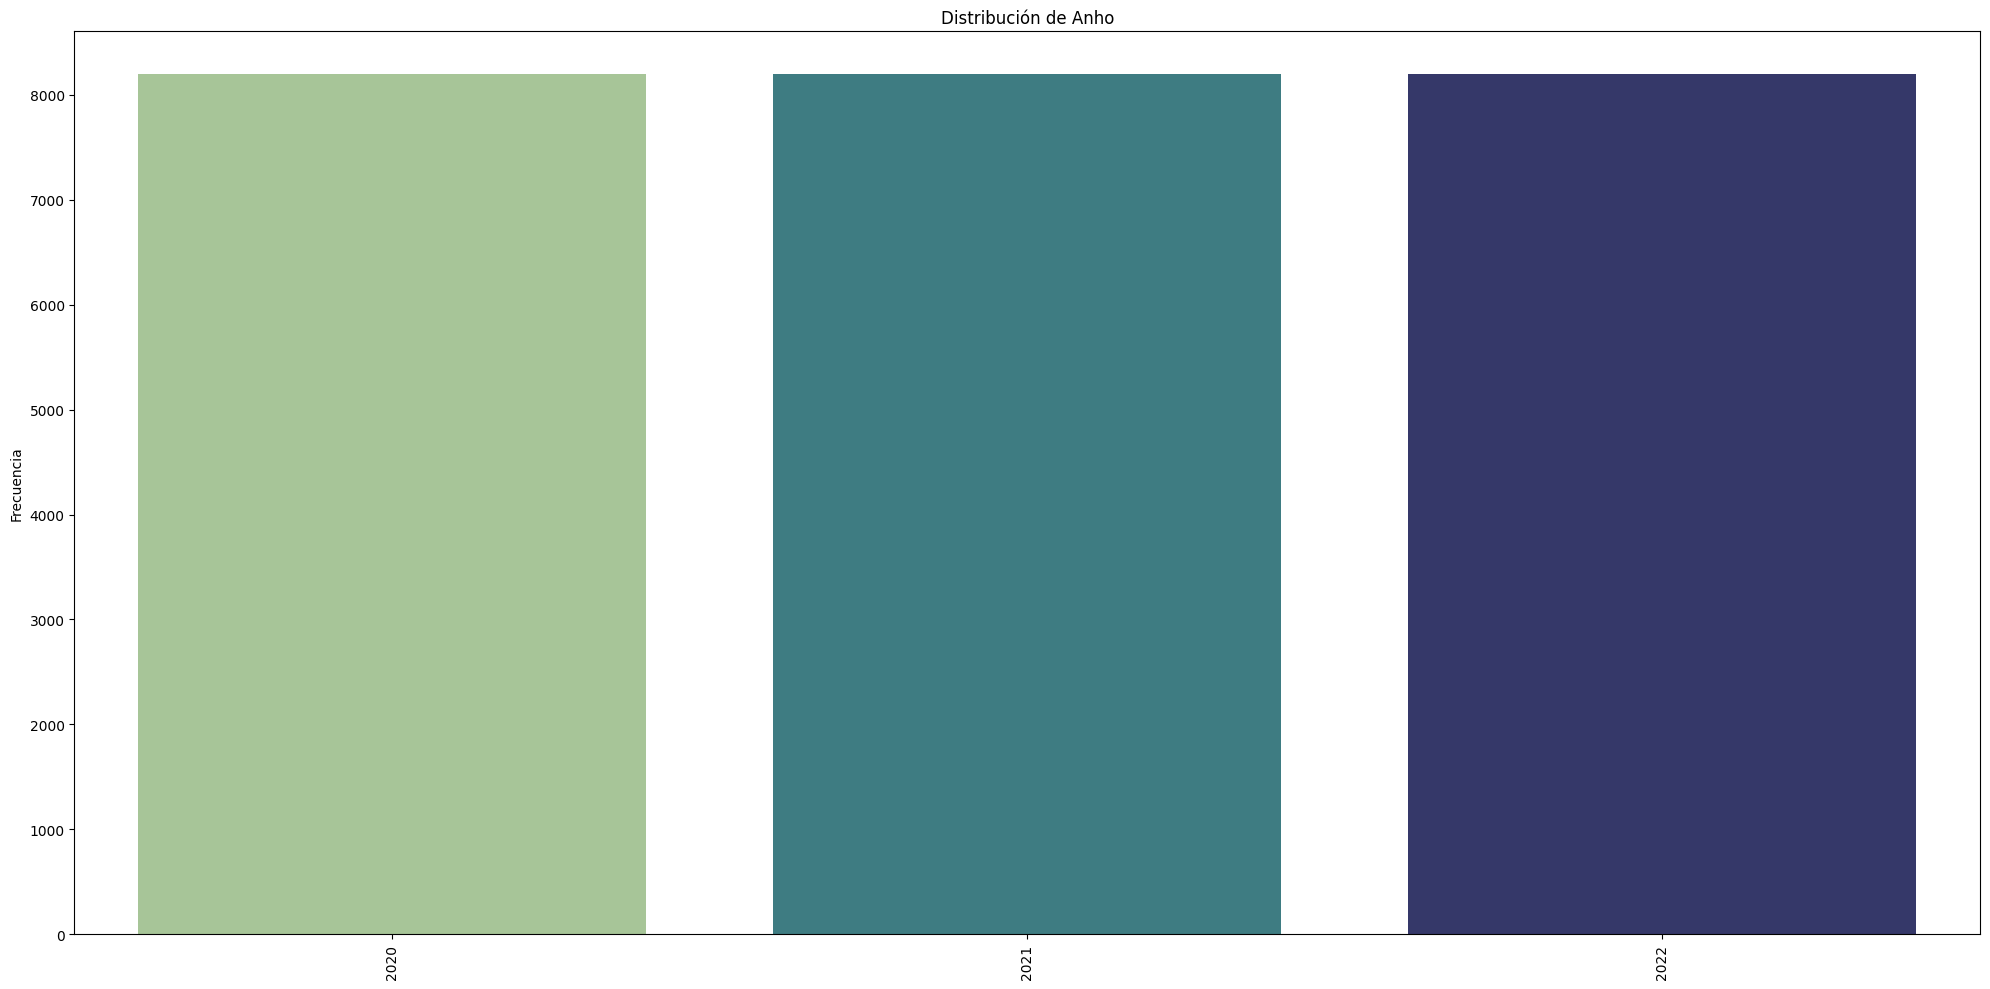

In [21]:
barras_frecuencias(dgt,"Anho")

In [41]:
dgt.Municipio.value_counts().nlargest(20)

Municipio
Torrent                       6
Sobrado                       6
Moya                          6
Sancti-Spíritus               6
Sada                          6
Arroyomolinos                 6
Rebollar                      6
Zarza, La                     6
Castejón                      6
Mieres                        6
Campillo, El                  6
Villaescusa                   6
Cieza                         6
Fonfría                       6
Villanueva de los Infantes    6
Cabanes                       6
Molar, El                     6
Campillo de Azaba             3
Canillas de Abajo             3
Candelario                    3
Name: count, dtype: int64

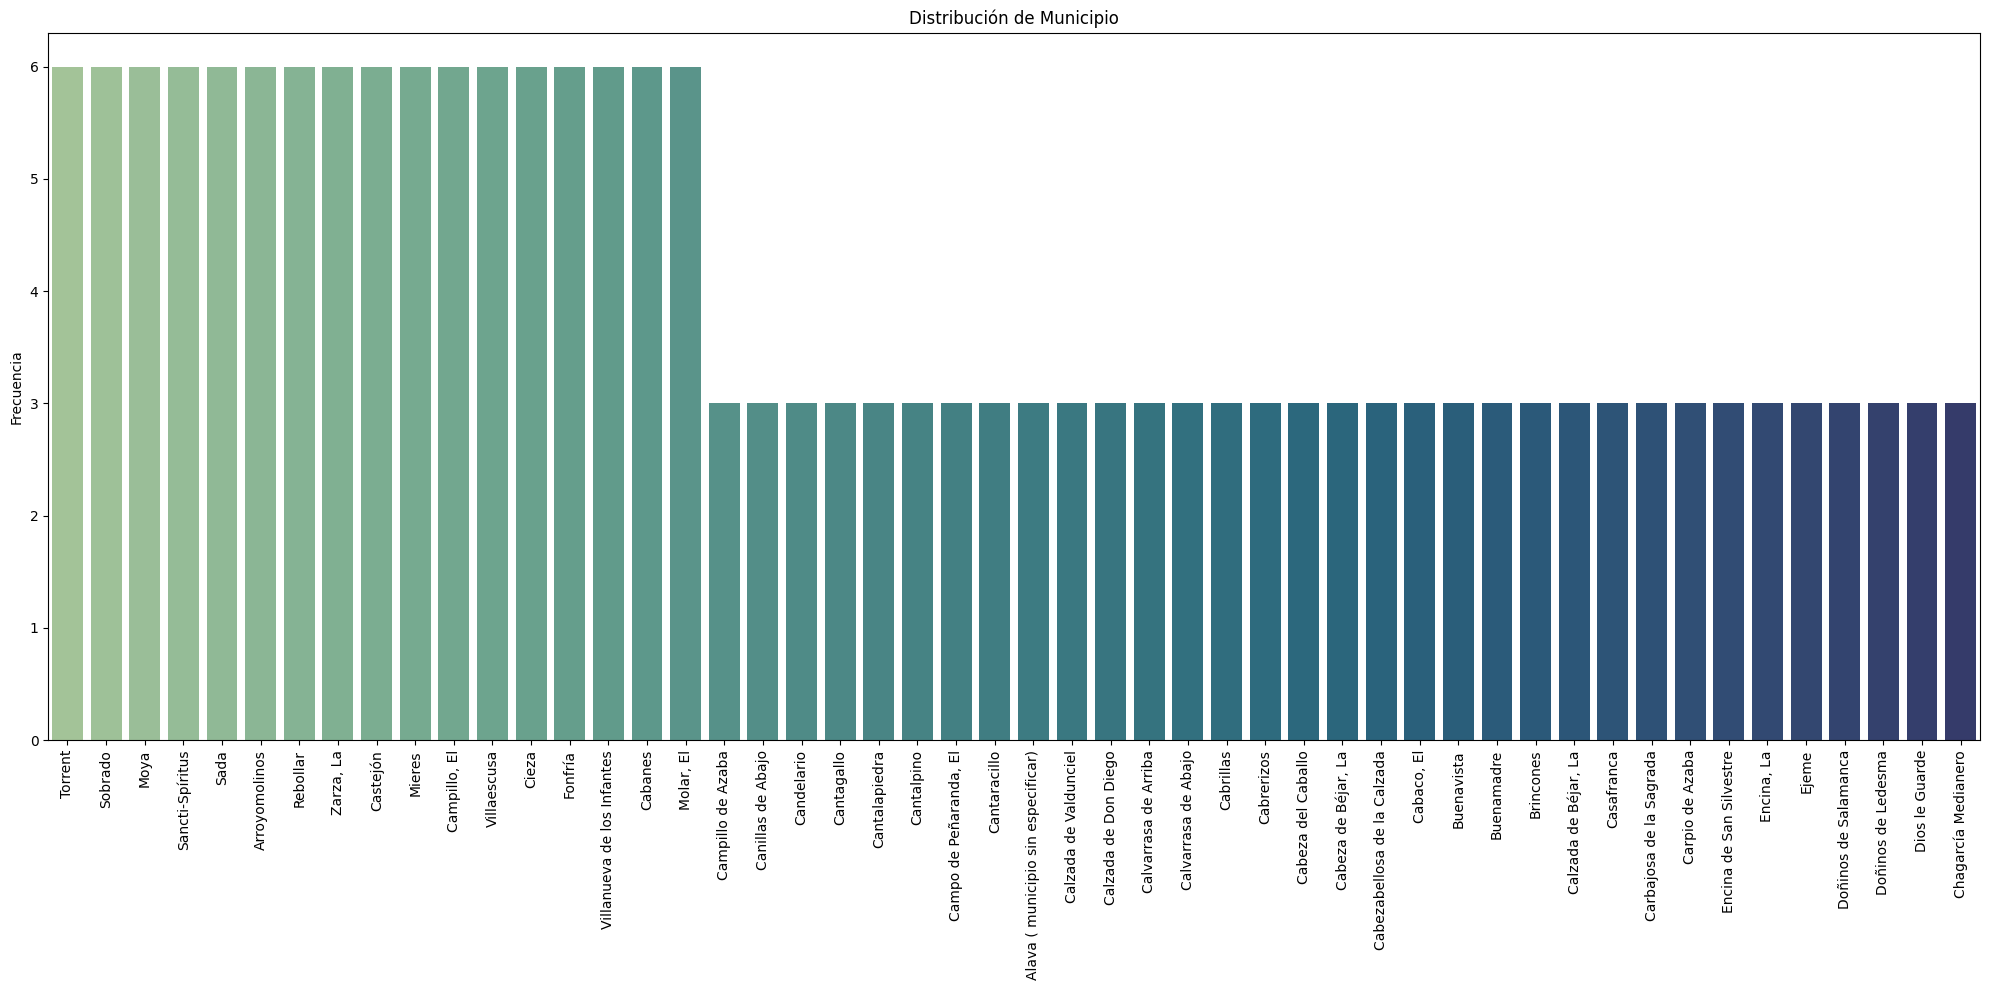

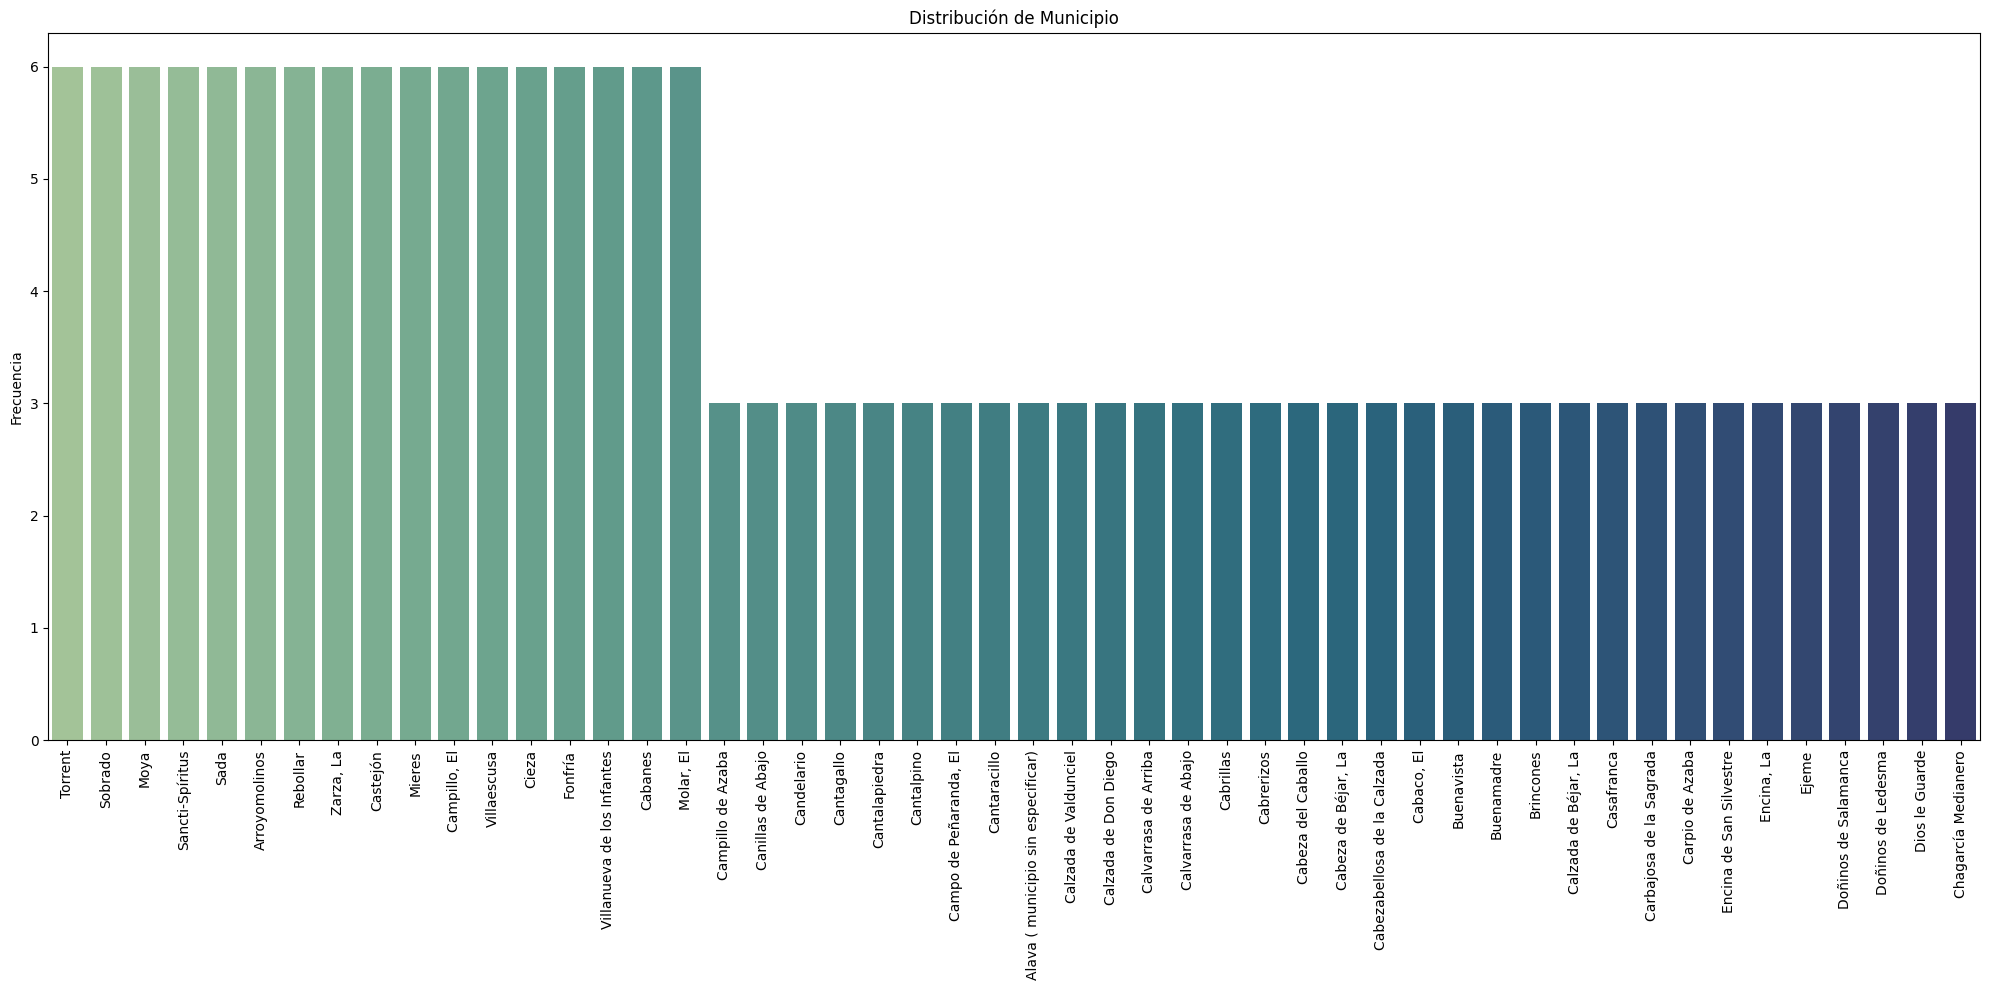

In [26]:
barras_frecuencias(dgt,"Municipio",tamaño=50)

In [51]:
dgt.Provincia.value_counts()

Provincia
Burgos                    1116
Salamanca                 1089
Barcelona                  936
Zaragoza                   882
Guadalajara                867
Navarra                    819
Valencia/València          801
Ávila                      747
Zamora                     747
Cuenca                     717
Teruel                     711
Lleida                     696
Valladolid                 678
Cáceres                    672
Girona                     666
León                       636
Segovia                    630
Toledo                     615
Huesca                     609
Palencia                   576
Tarragona                  555
Soria                      552
Madrid                     540
Rioja (La)                 525
Granada                    525
Badajoz                    498
Alicante/Alacant           426
Castellón/Castelló         408
Bizkaia                    339
Sevilla                    321
Almería                    312
Málaga                     31

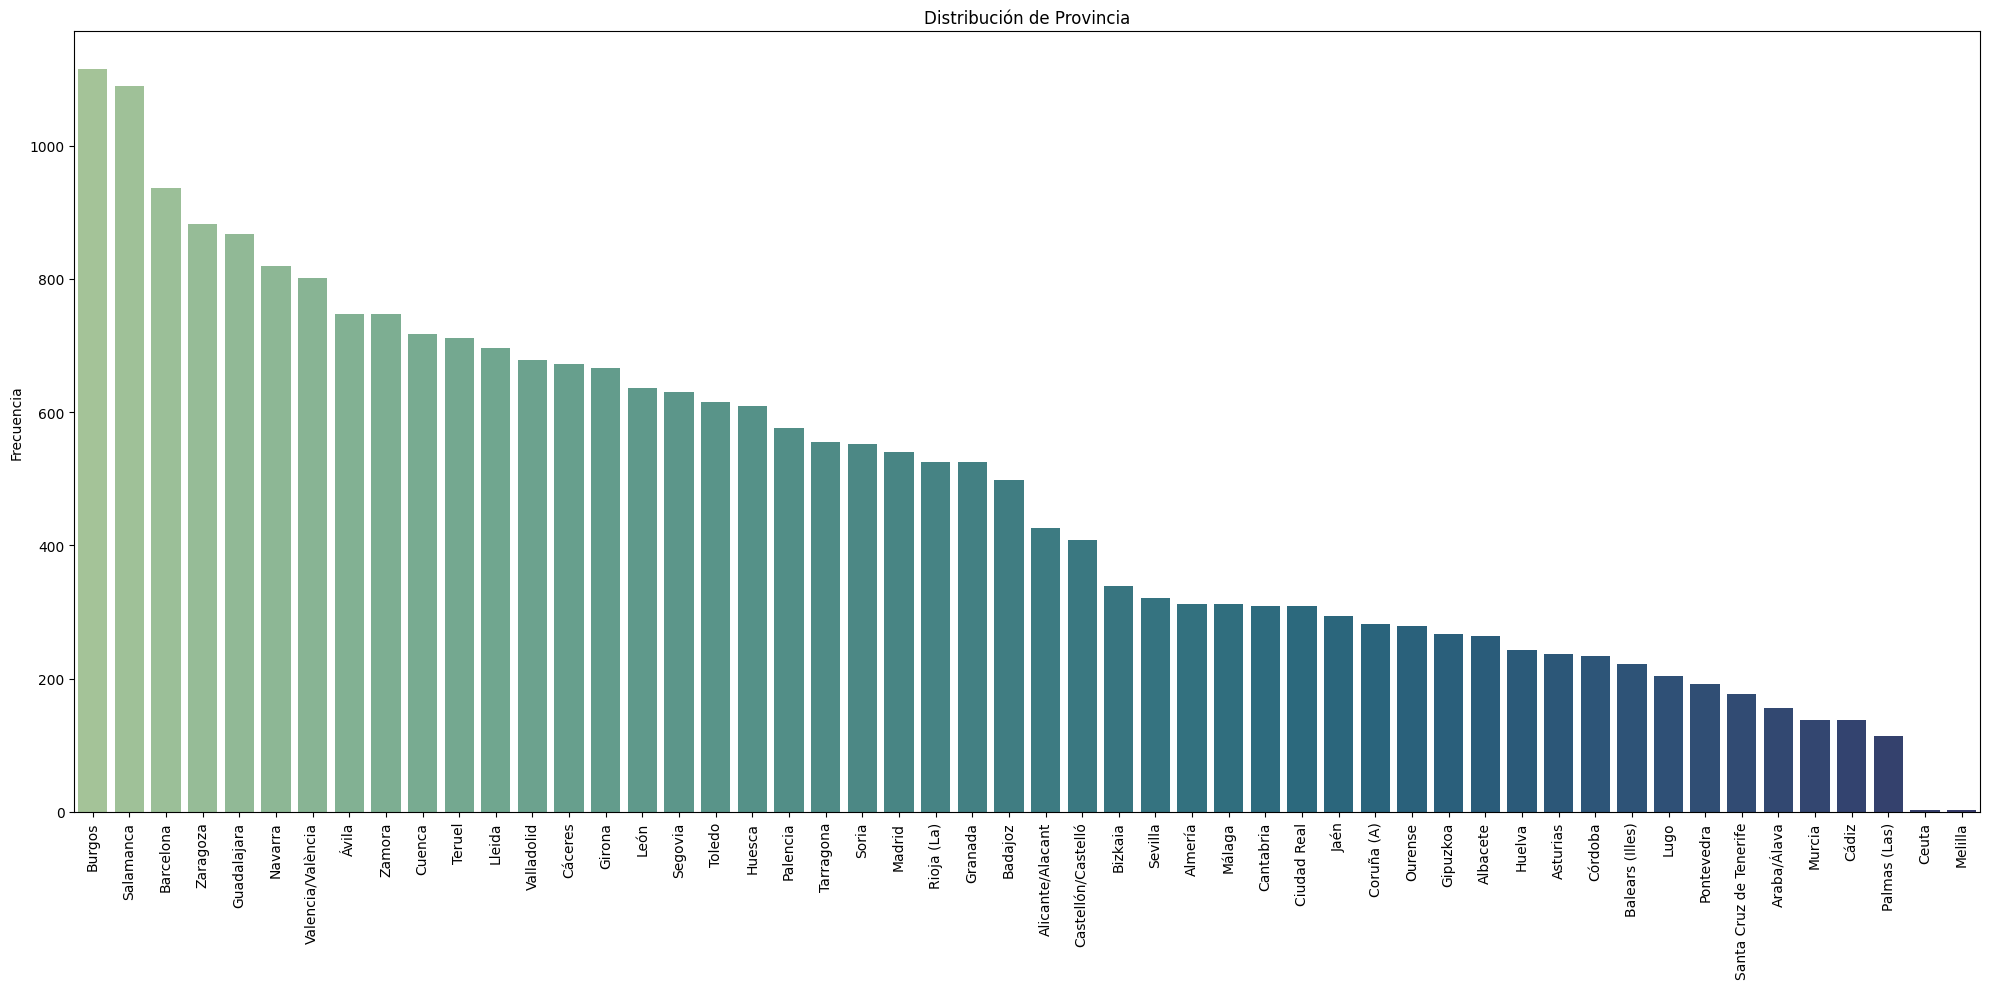

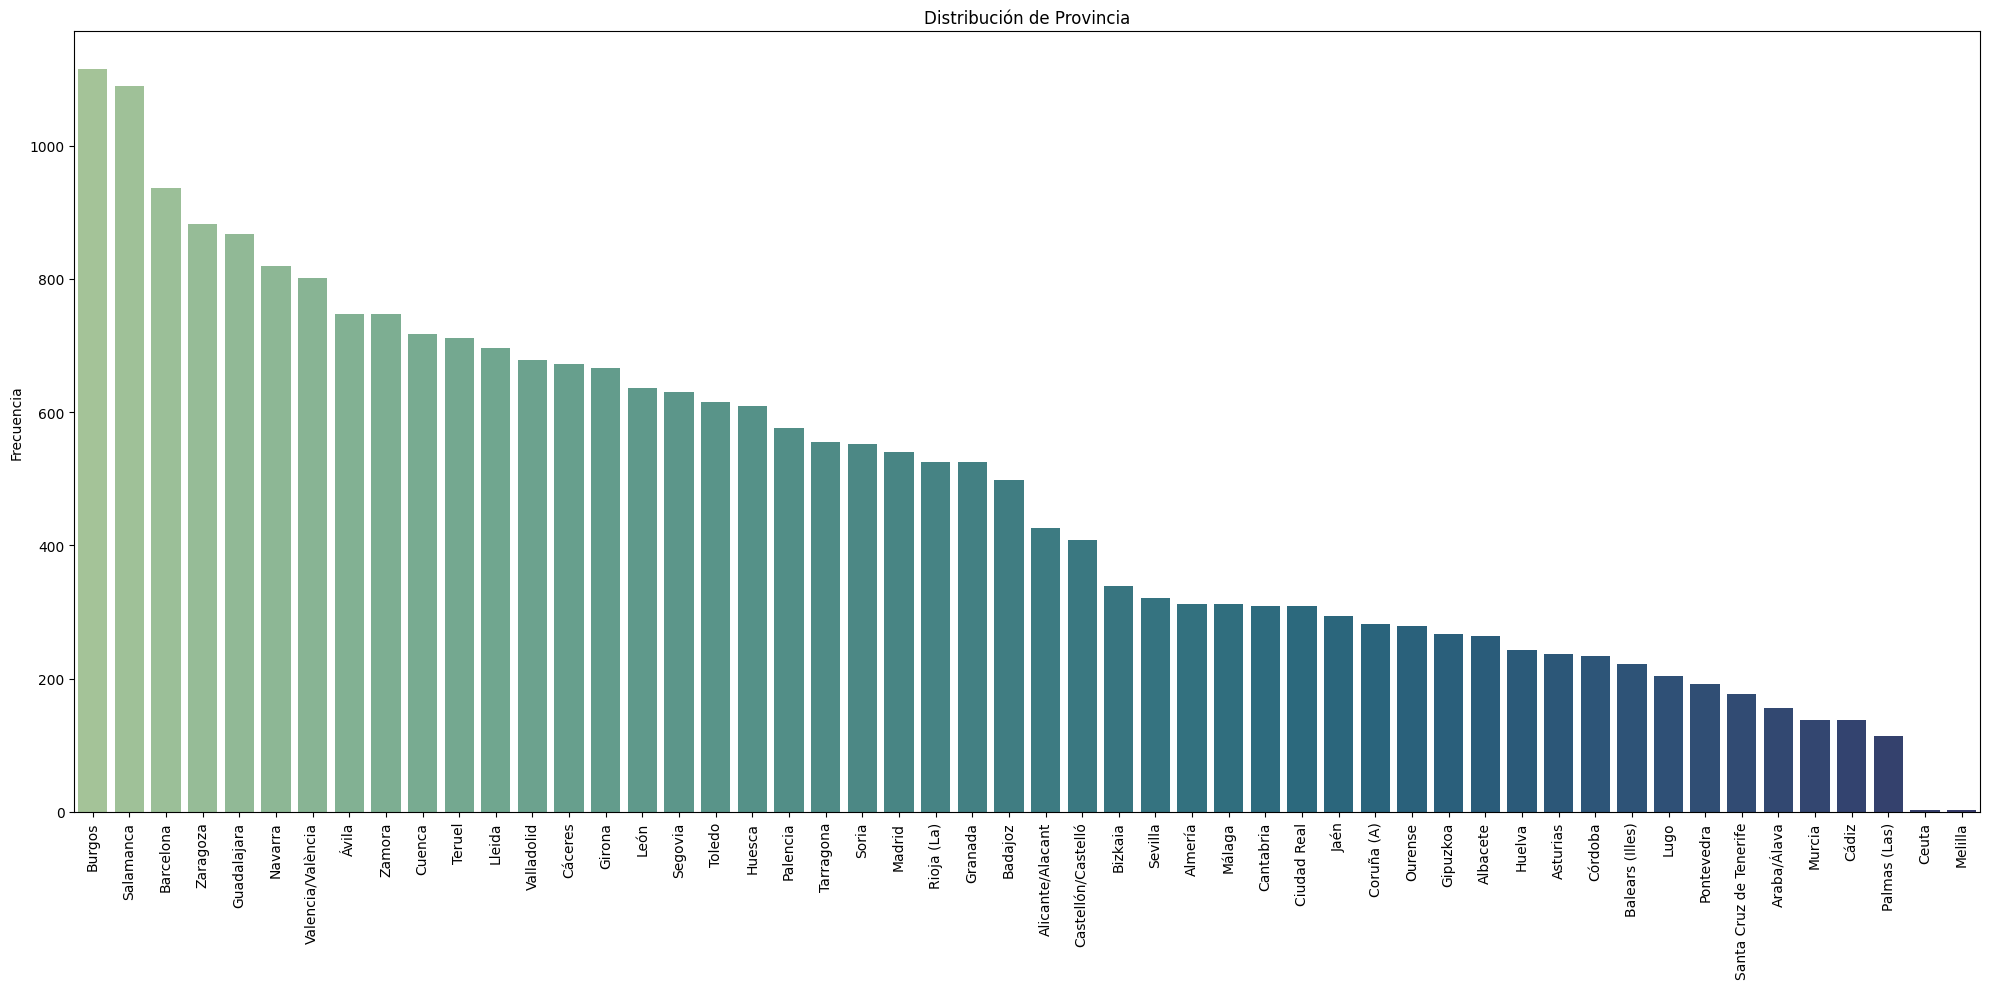

In [24]:
barras_frecuencias(dgt,"Provincia")

In [53]:
dgt["Comunidad Autónoma"].value_counts()

Comunidad Autónoma
Castilla y León                 6771
Cataluña                        2853
Castilla-La Mancha              2772
Andalucía                       2379
Aragón                          2202
Comunitat Valenciana            1635
Extremadura                     1170
Galicia                          957
Navarra (Comunidad Foral de)     819
País Vasco                       762
Madrid (Comunidad de)            540
Rioja (La)                       525
Cantabria                        309
Canarias                         291
Asturias (Principado de)         237
Balears (Illes)                  222
Murcia (Región de)               138
Ceuta                              3
Melilla                            3
Name: count, dtype: int64

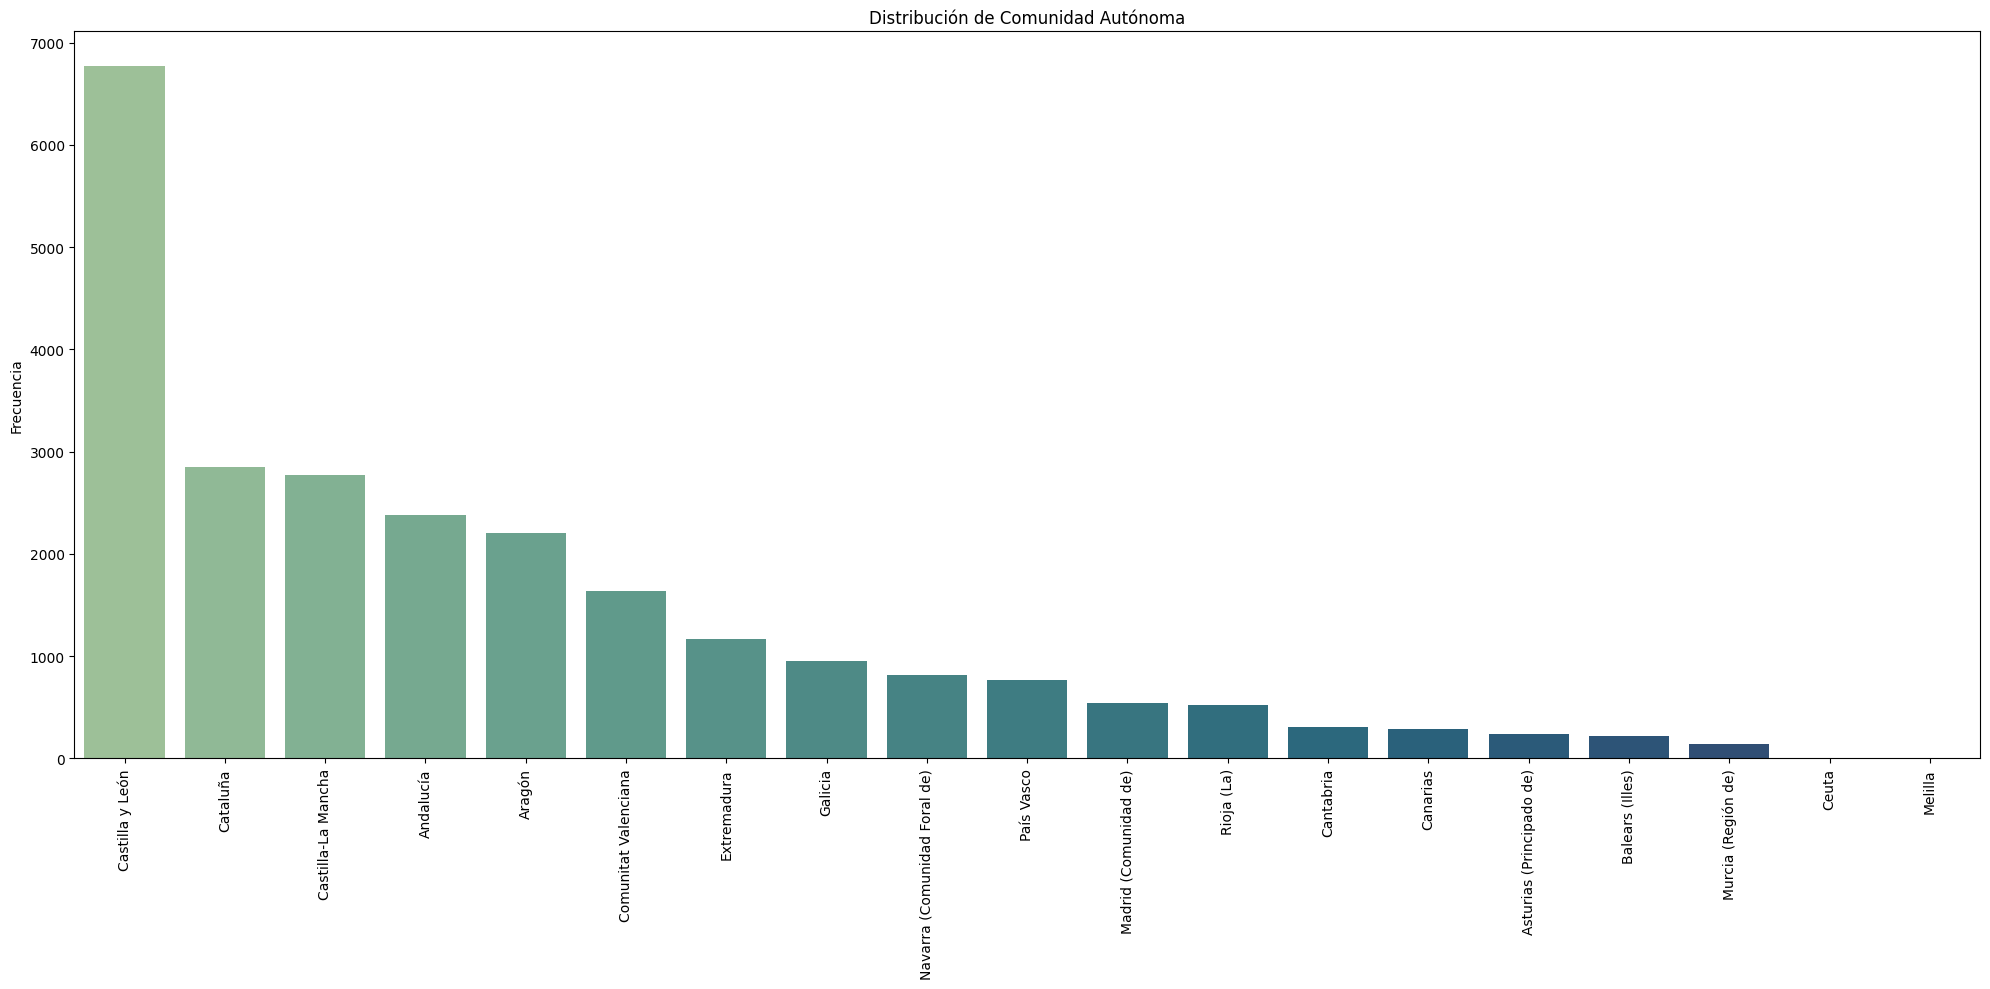

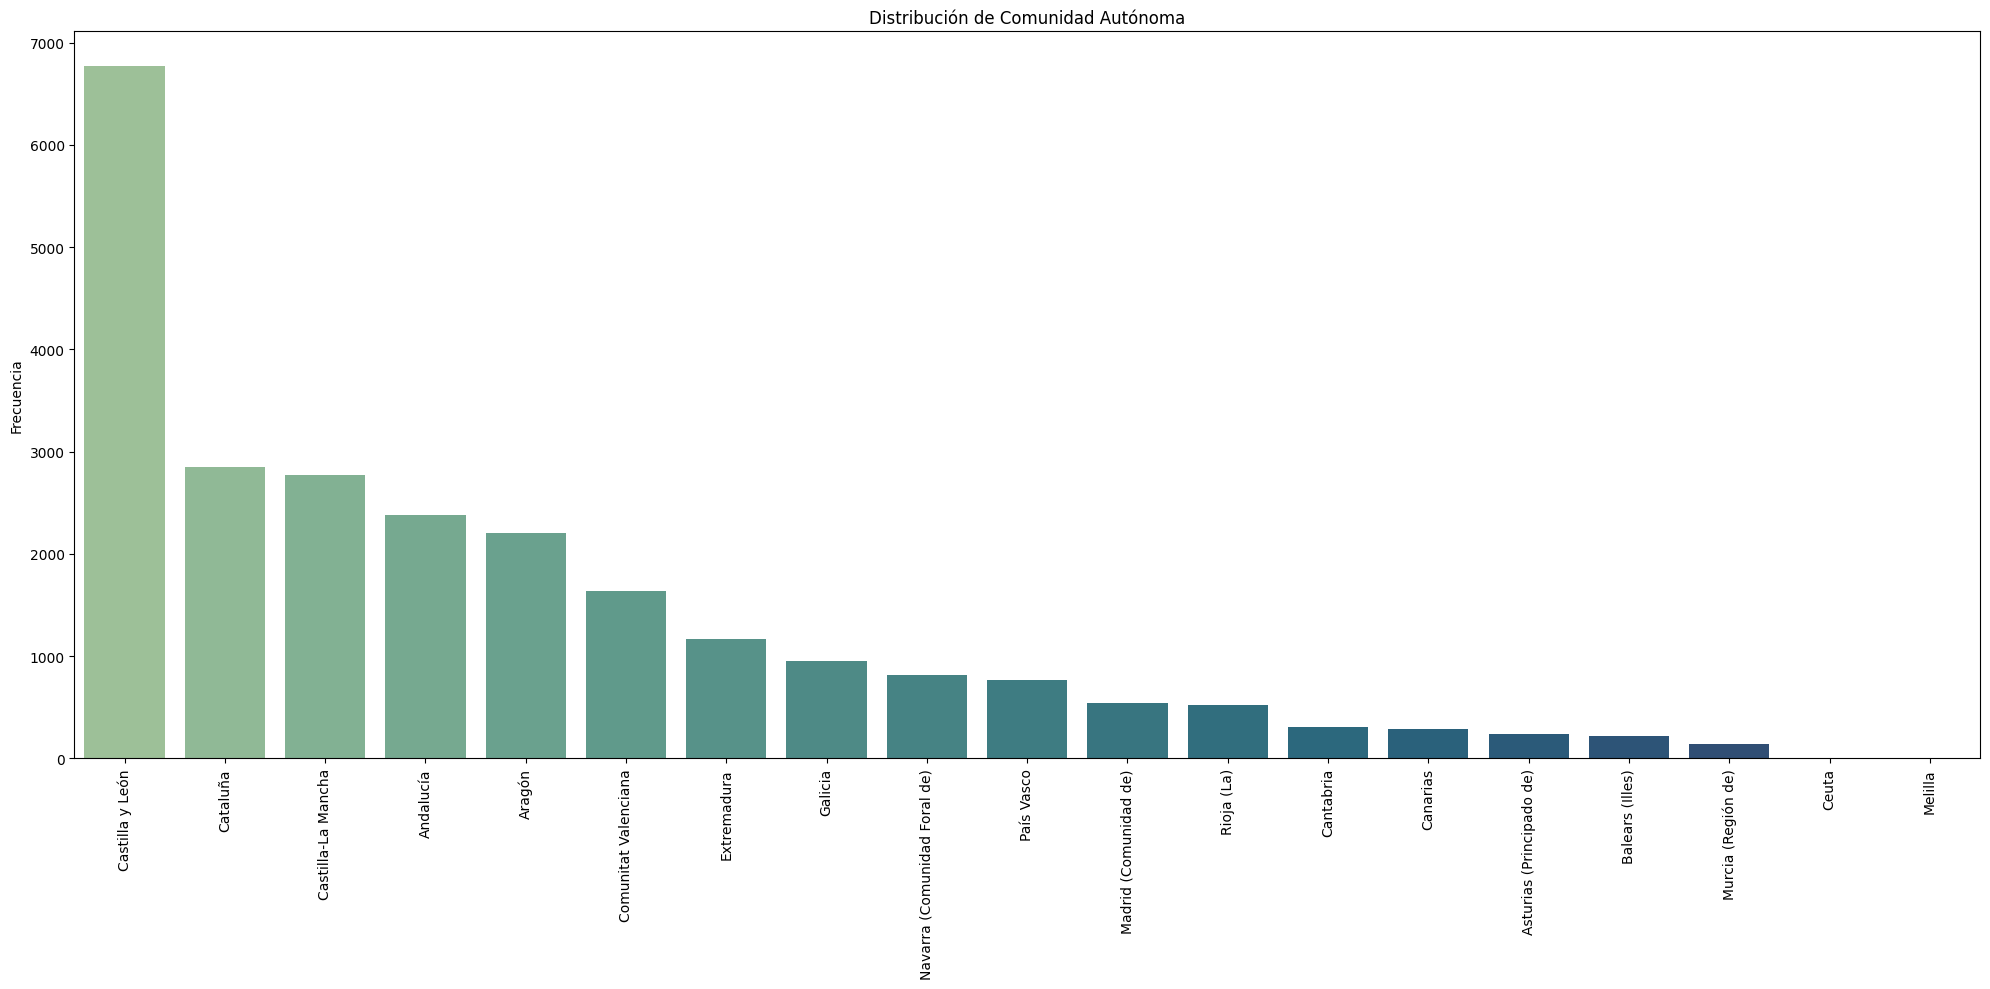

In [25]:
barras_frecuencias(dgt,"Comunidad Autónoma")